In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

### Training the model without adjusting the home_team and away_team stats

In [2]:
df = pd.read_csv("Training_final_v1.0.csv")

In [3]:
X = df.drop(columns=['result'])
y = df['result']

In [4]:
categorical_features = ['season_x', 'team_x', 'opp_team_name']
numerical_features = ['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'yellow_cards', 'GW']

# Define preprocessing steps for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Combine preprocessing steps for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Create a pipeline with preprocessing and the Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model accuracy
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8702830188679245


### Training the model by adjusting the home_team and away_team stats

In [6]:
df_adjusted = pd.read_csv('data_after_feature_engineering.csv')
df_adjusted.columns

Index(['Unnamed: 0', 'Match', 'season_x', 'Winner', 'assists_Home',
       'attempted_passes_Home', 'big_chances_created_Home',
       'big_chances_missed_Home', 'clean_sheets_Home',
       'clearances_blocks_interceptions_Home', 'completed_passes_Home',
       'creativity_Home', 'dribbles_Home', 'ea_index_Home', 'element_Home',
       'errors_leading_to_goal_Home', 'errors_leading_to_goal_attempt_Home',
       'fouls_Home', 'goals_conceded_Home', 'goals_scored_Home',
       'ict_index_Home', 'influence_Home', 'key_passes_Home',
       'open_play_crosses_Home', 'own_goals_Home', 'penalties_conceded_Home',
       'penalties_missed_Home', 'penalties_saved_Home', 'tackles_Home',
       'target_missed_Home', 'threat_Home', 'expected_assists_Home',
       'expected_goal_involvements_Home', 'expected_goals_Home',
       'expected_goals_conceded_Home', 'assists_Away', 'attempted_passes_Away',
       'big_chances_created_Away', 'big_chances_missed_Away',
       'clean_sheets_Away', 'clearances

In [12]:
df_adjusted['Winner'].replace({'H':1, 'A': 2, 'D': 0}, inplace=True)
df_adjusted['Winner'].value_counts()

Winner
1    861
2    614
0    450
Name: count, dtype: int64

Preprocessing

In [31]:
X = df_adjusted[['expected_assists_Home', 'expected_goal_involvements_Home', 'expected_goals_Home', 'expected_goals_conceded_Home','threat_Home','expected_assists_Away', 'expected_goal_involvements_Away', 'expected_goals_Away', 'expected_goals_conceded_Away','threat_Away']]

In [32]:
# X = df_adjusted.drop(columns=['Match', 'Winner', 'season_x'])
Y = df_adjusted['Winner']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## RandomForestClassifier

Test Accuracy: 0.8337662337662337
Train Accuracy: 0.9980519480519481


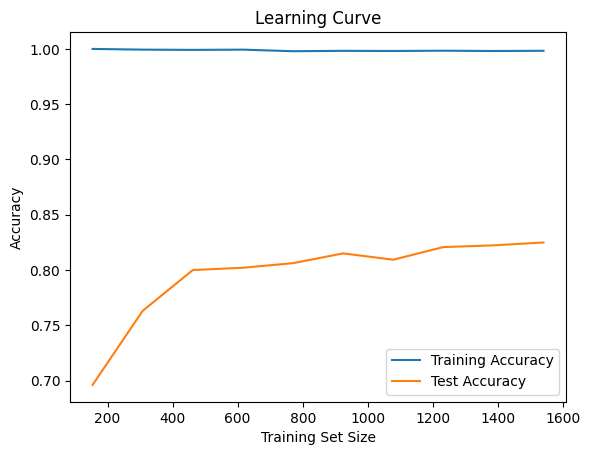

In [33]:


# Initialize the Random Forest classifier
RandomF = RandomForestClassifier(n_estimators=100, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
RandomF.fit(X_train, y_train)

# Evaluating the performance on test set
test_accuracy = RandomF.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

# Evaluating the performance on training set
train_accuracy = RandomF.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

# Plotting the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(RandomF, X_scaled, Y, train_sizes=train_sizes, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

## K-Nearest Neighbors (KNN)